In [15]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt

In [3]:
NF = 489 #number of files
NP = 24763 #number of particles
r1 = 0.002
r2 = 0.002
v1=(4/3*math.pi*r1*r1*r1)
v2=(4/3*math.pi*r2*r2*r2)
v = 0.03*0.03*0.03
rx = 5
ry = 5
rz = 10
tamanho = rx*ry*rz-1

cout1=list()
posicaoX = np.zeros((NP,NF))
posicaoY = np.zeros((NP,NF))
posicaoZ = np.zeros((NP,NF))
Tipo = np.zeros((NP,NF))
contador_tipo1 = pd.DataFrame(np.zeros((tamanho,NF)))  # type: DataFrame
contador_tipo2 = pd.DataFrame(np.zeros((tamanho,NF)))
Volume = pd.DataFrame(np.zeros((tamanho,NF)))
posicao_vetor = 1

In [7]:
path = '/media/rodolfo/5A0819190818F5AB/Doutorado/numerico/CasosMisturados/08/dados'
os.chdir(path)

In [8]:
for j in range (0,NF):
    Dados = pd.read_csv('dados.{}.csv'.format(j))
    Tipo[:, j] = Dados.iloc[:, 1].copy()
    posicaoX[:, j] = Dados.iloc[:, 3].copy()
    posicaoY[:, j] = Dados.iloc[:, 4].copy()
    posicaoZ[:, j] = Dados.iloc[:, 5].copy()

In [9]:
posicaoX=pd.DataFrame(posicaoX)
posicaoY=pd.DataFrame(posicaoY)
posicaoZ=pd.DataFrame(posicaoZ)
Tipo=pd.DataFrame(Tipo)

max_x = float(posicaoX.iloc[:,[1]].max())
max_y = float(posicaoY.iloc[:,[1]].max())
max_z = float(posicaoZ.iloc[:,[1]].max())
min_x = float(posicaoX.iloc[:,[1]].min())
min_y = float(posicaoY.iloc[:,[1]].min())
min_z = float(posicaoZ.iloc[:,[1]].min())

gradeamentoX = (abs(max_x) + abs(min_x)) / rx
gradeamentoY = (abs(max_y) + abs(min_y)) / ry
gradeamentoZ = (abs(max_z) + abs(min_z)) / rz

InferiorX=float(posicaoX.iloc[:,[1]].min())
InferiorY=float(posicaoY.iloc[:,[1]].min())
InferiorZ=float(posicaoZ.iloc[:,[1]].min())

In [10]:
for m in range(0,NF):
    p=0
    q=0,
    concluido = m/NF*100
    print(concluido)
    for n in range(1, len(posicaoX)):
        px = math.floor((posicaoX.iloc[n,m]-min_x)/gradeamentoX)
        py = math.floor((posicaoY.iloc[n,m]-min_y)/gradeamentoY)
        pz = math.floor((posicaoZ.iloc[n,m]-min_z)/gradeamentoZ)
        posicao_vetor = -31+px+5*py+25*pz

        if Tipo.iloc[n,m]<1.5:
            contador_tipo1.iloc[posicao_vetor,m] = contador_tipo1.iloc[posicao_vetor,m]+1
        else:
            contador_tipo2.iloc[posicao_vetor, m] = contador_tipo2.iloc[posicao_vetor, m] + 1
Volume = contador_tipo1*v1/v*100+contador_tipo2*v2/v*100

0.0
0.2044989775051125
0.408997955010225
0.6134969325153374
0.81799591002045
1.0224948875255624
1.2269938650306749
1.4314928425357873
1.6359918200409
1.8404907975460123
2.044989775051125
2.2494887525562373
2.4539877300613497
2.658486707566462
2.8629856850715747
3.067484662576687
3.2719836400818
3.476482617586912
3.6809815950920246
3.885480572597137
4.08997955010225
4.294478527607362
4.4989775051124745
4.703476482617587
4.9079754601226995
5.112474437627812
5.316973415132924
5.521472392638037
5.725971370143149
5.930470347648262
6.134969325153374
6.339468302658487
6.5439672801636
6.748466257668712
6.952965235173824
7.157464212678937
7.361963190184049
7.566462167689162
7.770961145194274
7.975460122699387
8.1799591002045
8.384458077709612
8.588957055214724
8.793456032719837
8.997955010224949
9.202453987730062
9.406952965235174
9.611451942740286
9.815950920245399
10.020449897750511
10.224948875255624
10.429447852760736
10.633946830265849
10.838445807770961
11.042944785276074
11.2474437627811

91.61554192229039
91.8200408997955
92.02453987730061
92.22903885480572
92.43353783231085
92.63803680981594
92.84253578732107
93.04703476482618
93.25153374233128
93.4560327198364
93.66053169734151
93.86503067484662
94.06952965235173
94.27402862985686
94.47852760736197
94.68302658486708
94.88752556237219
95.0920245398773
95.29652351738241
95.50102249488752
95.70552147239265
95.91002044989774
96.11451942740287
96.31901840490798
96.52351738241309
96.7280163599182
96.93251533742331
97.13701431492842
97.34151329243353
97.54601226993866
97.75051124744377
97.95501022494888
98.15950920245399
98.3640081799591
98.56850715746421
98.77300613496932
98.97750511247445
99.18200408997954
99.38650306748467
99.59100204498978
99.79550102249489


In [11]:
for n in range(0, len(Volume)):
    if Volume.iloc[n,NF-1]>5:
        cout1.append((contador_tipo1.iloc[n,:]*v1)/((contador_tipo1.iloc[n,:]*v1)+(contador_tipo2.iloc[n,:]*v2)))

In [12]:
cout1=pd.DataFrame(cout1)
indice=pd.DataFrame(cout1.std())
indice.to_csv('dados08.csv')

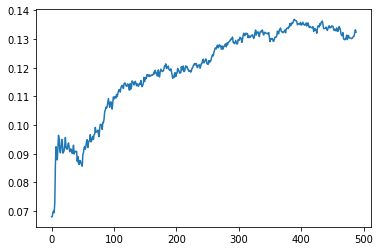

In [19]:
x = np.arange(len(indice))
plt.plot(x,indice)
plt.show()